In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_validate,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import xgboost
import lightgbm as lgb


OSError: dlopen(/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightgbm/lib/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: <AF2B35E2-56EE-3669-88A6-BBD75577D81F> /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightgbm/lib/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file, not in dyld cache)

In [ ]:
train = pd.read_csv("train_dataset.csv")
test = pd.read_csv("test_dataset.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [ ]:
train.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [ ]:
#checking outliers
"""plt.figure(3,3)
for column in train.columns:
    sns.histplot(data=train, x = column)
    plt.show()"""

'plt.figure(3,3)\nfor column in train.columns:\n    sns.histplot(data=train, x = column)\n    plt.show()'

In [ ]:
train.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [ ]:
train["HDL"] = train["HDL"].astype("category")
train["LDL"] = train["LDL"].astype("category")
train["AST"] = train["AST"].astype("category")
train["ALT"] = train["ALT"].astype("category")
train["hearing(left)"] = train["hearing(left)"].astype("category")
train["hearing(right)"] = train["hearing(right)"].astype("category")
train["Urine protein"] = train["Urine protein"].astype("category")
train["dental caries"] = train["dental caries"].astype("category")
train["smoking"] = train["smoking"].astype("category")

In [ ]:
column_value_counts = {col: pd.DataFrame(train[col].value_counts()) for col in train.columns}
print(column_value_counts.keys())

column_value_counts['dental caries']


dict_keys(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking'])


,count
dental caries,
0,30625
1,8359


In [ ]:
"""for column in train.columns:
    sns.countplot(train, x=column, hue="smoking")
    plt.show()"""

'for column in train.columns:\n    sns.countplot(train, x=column, hue="smoking")\n    plt.show()'

<Axes: xlabel='hemoglobin', ylabel='Gtp'>

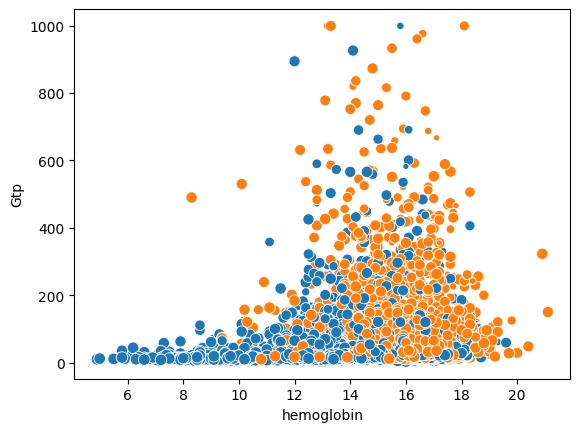

In [ ]:
sns.scatterplot(
    data=train,
    x='hemoglobin',
    y='Gtp',
    size='ALT',
    hue='smoking',
    legend=False
)

<Axes: >

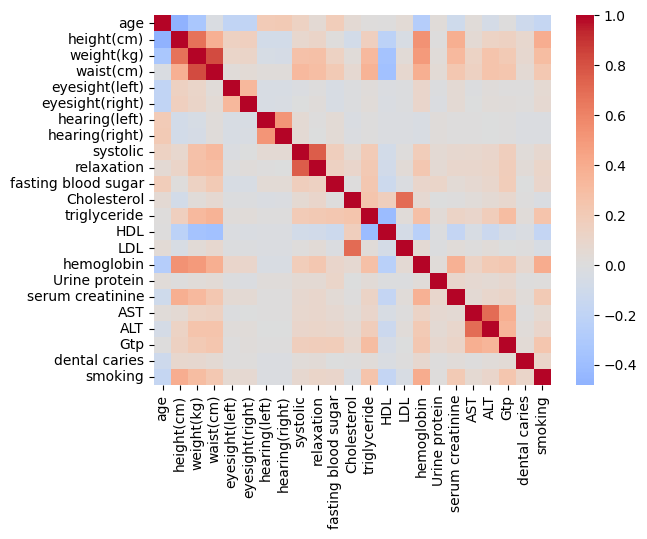

In [ ]:
sns.heatmap(train.corr(), cmap=sns.color_palette("coolwarm", as_cmap=True), center =0)

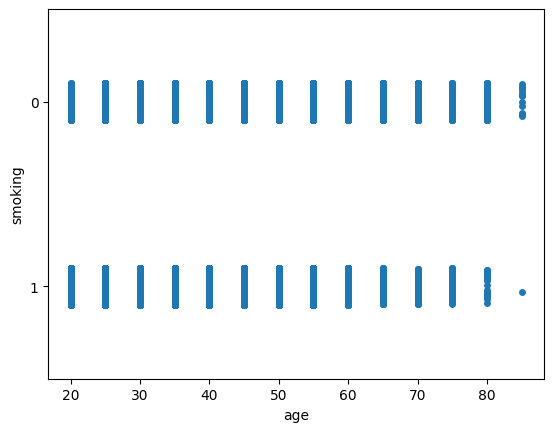

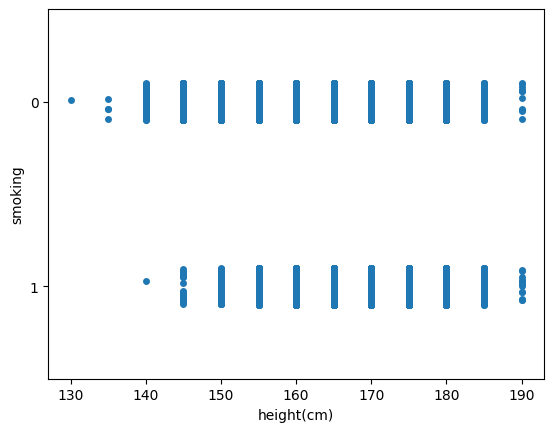

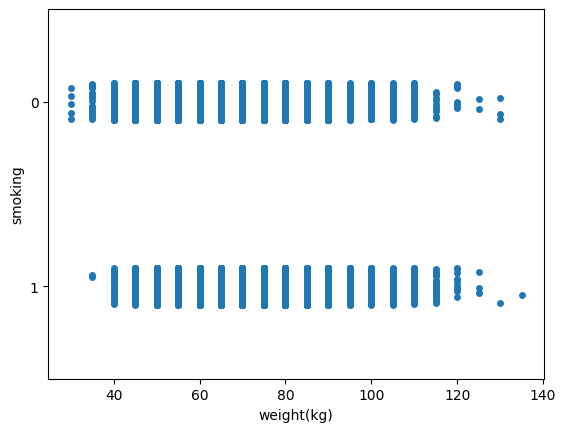

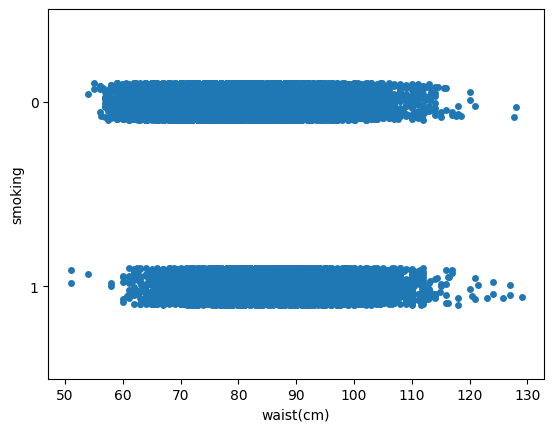

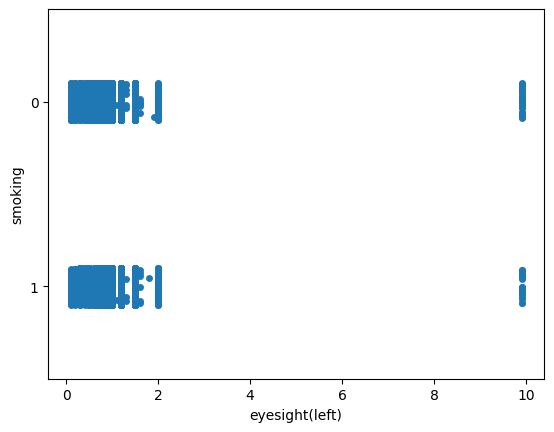

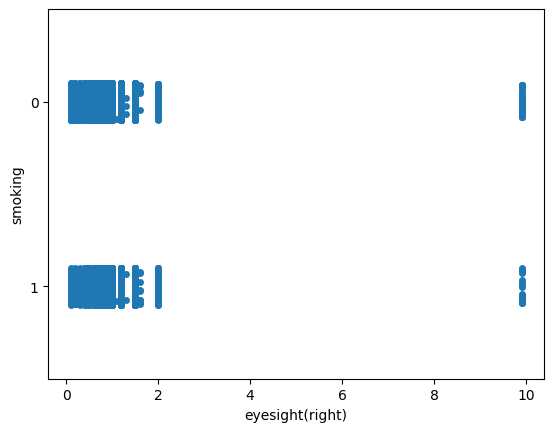

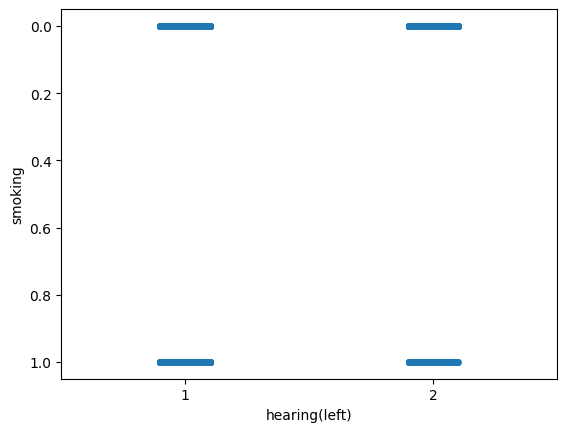

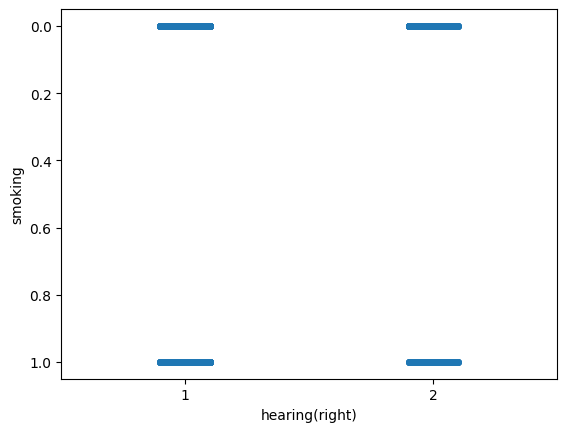

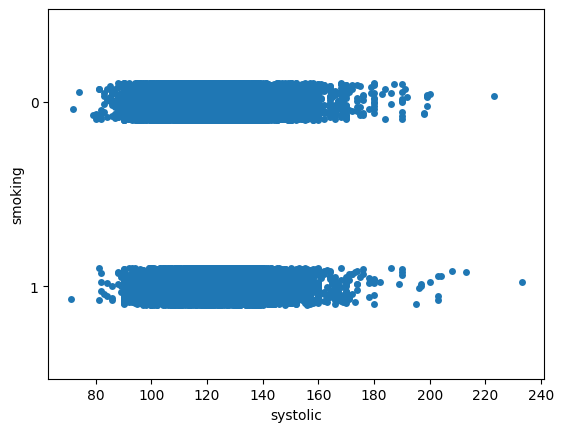

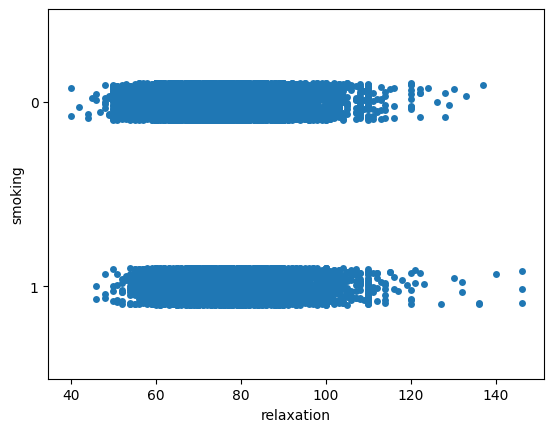

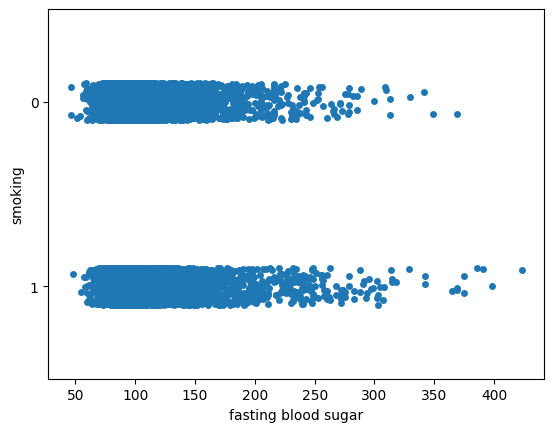

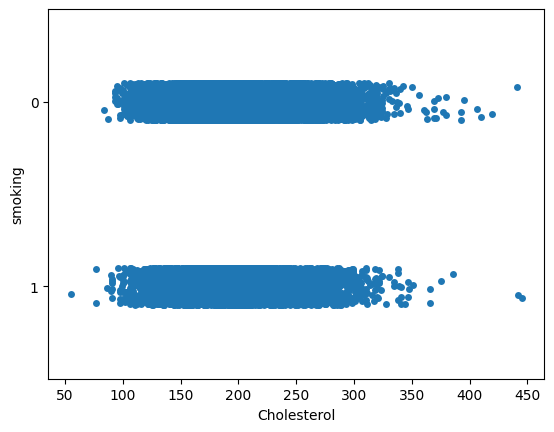

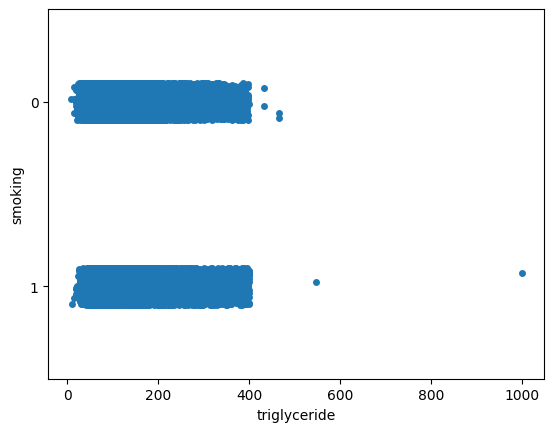

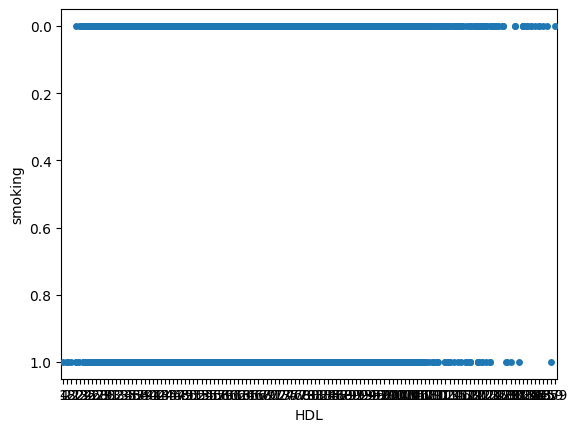

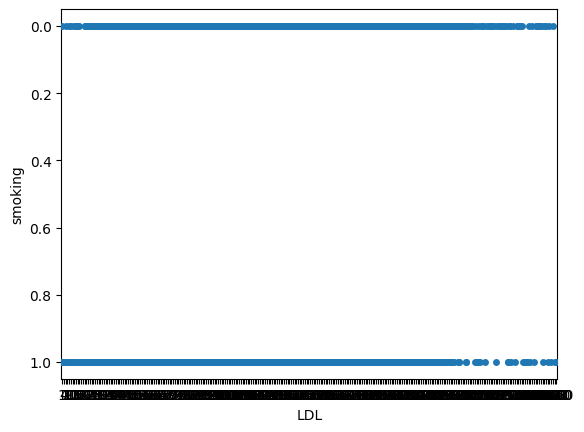

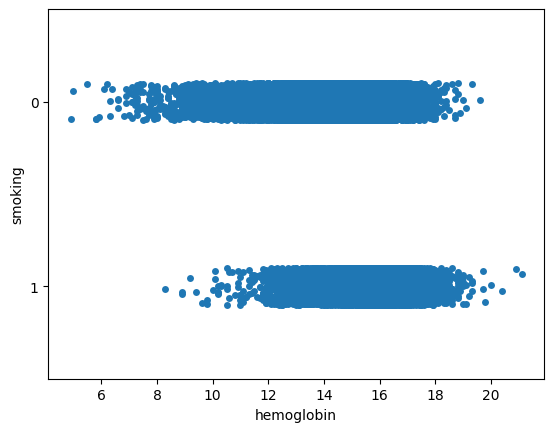

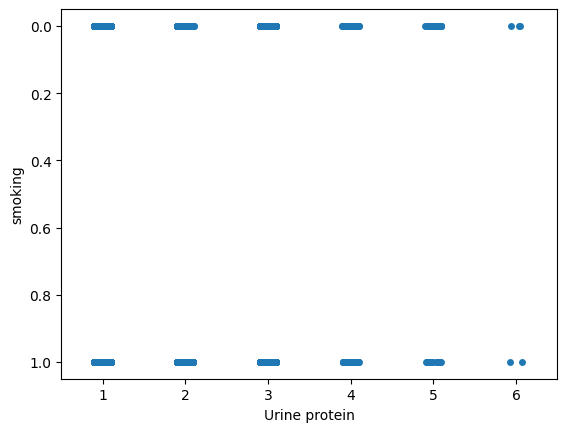

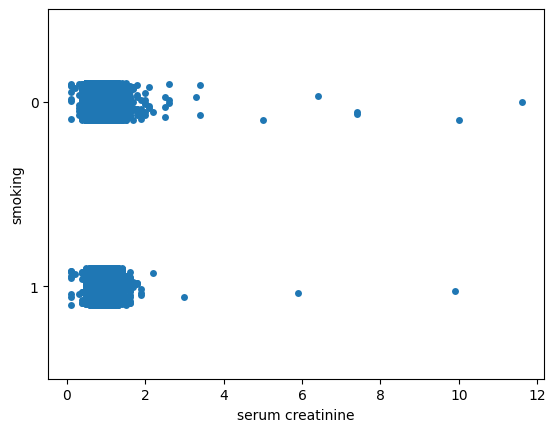

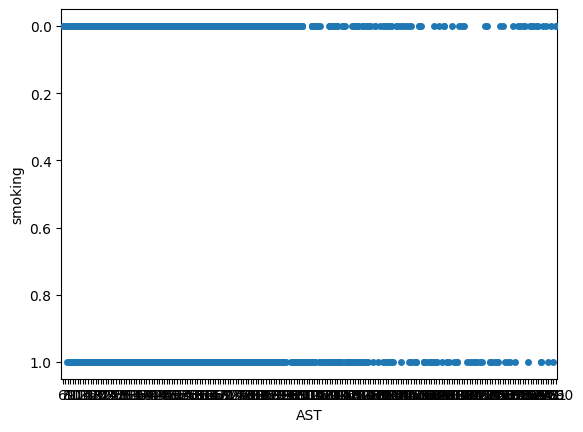

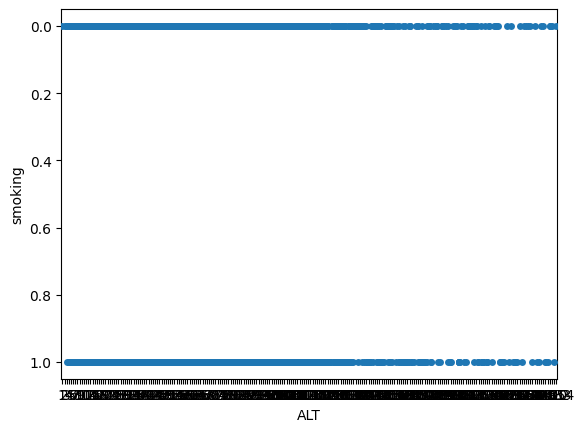

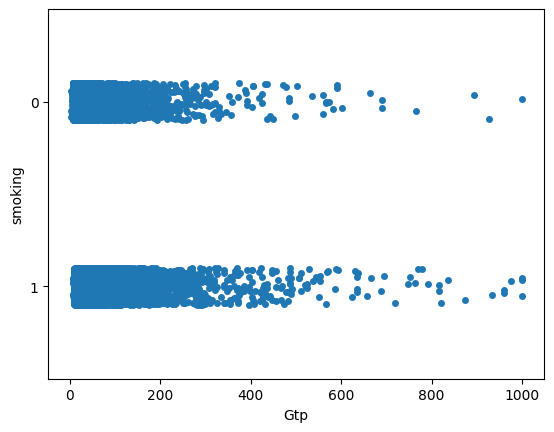

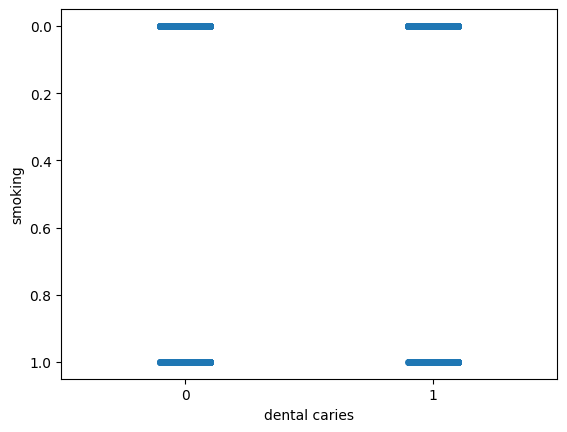

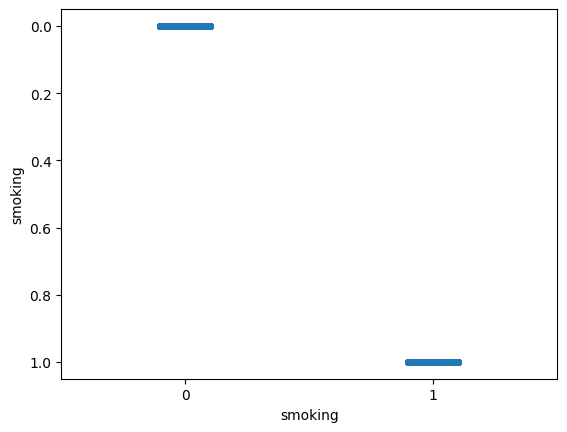

In [ ]:
for column in train.columns:
    sns.stripplot(data=train, y="smoking", x=column)
    plt.show()

In [ ]:
list(train.columns)

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'smoking']

In [ ]:
important_columns=[]
for column in train.columns:
    if train['smoking'].corr(train[column]) >= 0.1 and column != 'smoking':
        important_columns.append(column)

In [ ]:
scaler = MinMaxScaler()
target_column = train['smoking']
standardized_train = scaler.fit_transform( train[important_columns])
standardized_test = scaler.transform(test[important_columns])
standardized_train =  pd.DataFrame(standardized_train, columns=important_columns)
standardized_test = pd.DataFrame(standardized_test, columns=important_columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(standardized_train, target_column,test_size=0.3, random_state = 6)

In [ ]:
classifier_tree = DecisionTreeClassifier()
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
optimal_classifier_tree = GridSearchCV(classifier_tree, param_grid, cv=5)
optimal_classifier_tree.fit(X_train, y_train)
print(optimal_classifier_tree.best_estimator_)
print(optimal_classifier_tree.best_params_)
y_predicted1 = optimal_classifier_tree.predict(X_test)
print(confusion_matrix(y_test, y_predicted1))
print(classification_report(y_test, y_predicted1))

DecisionTreeClassifier(max_depth=7)
{'criterion': 'gini', 'max_depth': 7}
[[5631 1798]
 [1454 2813]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      7429
           1       0.61      0.66      0.63      4267

    accuracy                           0.72     11696
   macro avg       0.70      0.71      0.70     11696
weighted avg       0.73      0.72      0.72     11696


In [ ]:
classifier_forest = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
optimal_classifier_forest = GridSearchCV(estimator=classifier_forest, param_grid=param_grid, cv= 5)
optimal_classifier_forest.fit(X_train, y_train)
print(optimal_classifier_tree.best_estimator_)
print(optimal_classifier_tree.best_params_)
y_predicted2 = optimal_classifier_forest.predict(X_test)
print(confusion_matrix(y_test, y_predicted2))
print(classification_report(y_test, y_predicted2))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

[[5740 1689]
 [1359 2908]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      7429
           1       0.63      0.68      0.66      4267

    accuracy                           0.74     11696
   macro avg       0.72      0.73      0.72     11696
weighted avg       0.74      0.74      0.74     11696


In [ ]:
xgb_params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = xgboost.XGBClassifier(eval_metric="auc")
optimal_xbg = GridSearchCV(xgb, xgb_params, cv=3, n_jobs=-1, verbose=True)
optimal_xbg.fit(X_train, y_train)
print(optimal_xbg.best_estimator_)
print(optimal_xbg.best_params_)
y_predicted3 = optimal_xbg.predict(X_test)
print(confusion_matrix(y_test, y_predicted3))
print(classification_report(y_test, y_predicted3))

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
{'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 1.0}
[[5805 1624]
 [1388 2879]]
              precision    recall  f1-score   support

    

In [ ]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
train_dataset = pd.concat([standardized_train, target_column], axis=1)
setup(train_dataset,target='smoking')
compare_models()

NameError: name 'setup' is not defined

In [ ]:


train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
model = lgb.train(params, train_data, num_boost_round=100)
predictions = model.predict(X_test)
accuracy = (predictions.round() == y_test).mean()
print("Accuracy:", accuracy)

OSError: dlopen(/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightgbm/lib/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: <AF2B35E2-56EE-3669-88A6-BBD75577D81F> /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightgbm/lib/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file, not in dyld cache)